<a href="https://colab.research.google.com/github/21-LAKSHMI/AI-AND-ML/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to analyze the data pandas is used
import pandas as pd

In [2]:
# reading the dataset from folder
dataset=pd.read_csv("/content/Project 1 - Weather Dataset.csv")

In [3]:
# displaying the information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
# checking the value for weather
dataset["Weather"].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [6]:
dataset.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [21]:
#categorizing the prediction column under 4 to 5 category
def categorize_weather(condition):
    cond = condition.lower()

    # Mixed (Rain + Snow together)
    if "clear" in cond:
        return "Clear"

    # Snowy
    elif any(word in cond for word in ["snow", "pellets", "freezing drizzle"]):
        return "Snowy"

    # Rainy
    elif any(word in cond for word in ["rain", "drizzle", "shower", "thunderstorm"]):
        return "Rainy"

    # Cloudy / fog / haze
    elif any(word in cond for word in ["cloudy", "fog", "haze"]):
        return "Cloudy"

    else:
        return "Cloudy"

In [22]:
# storing the changed data into weather column
dataset["Weather"] = dataset["Weather"].apply(categorize_weather)

In [23]:
# splitting input values
ind=dataset[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [24]:
# splitting output values
dep=dataset[["Weather"]]

In [25]:
# importing train test split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [26]:
# importing tree based classification
from sklearn import tree

In [27]:
# Decision tree classification method
clf = tree.DecisionTreeClassifier()

In [28]:
# fitting xtrain and ytrain
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# predicting the output
y_pred=clf.predict(X_test)

In [30]:
# importing classification report from sklearn
from sklearn.metrics import classification_report

In [31]:
# checking values for precision, recall and f1 score
# storing classification of precision, recall and f1 score to cls
cls=classification_report(y_test, y_pred)

In [32]:
# displaying cls
print(cls)

              precision    recall  f1-score   support

       Clear       0.65      0.66      0.66       665
      Cloudy       0.64      0.65      0.64       809
       Rainy       0.55      0.50      0.53       154
       Snowy       0.73      0.68      0.71       129

    accuracy                           0.64      1757
   macro avg       0.64      0.62      0.63      1757
weighted avg       0.64      0.64      0.64      1757



In [33]:
#importing all the necessary libraries to plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

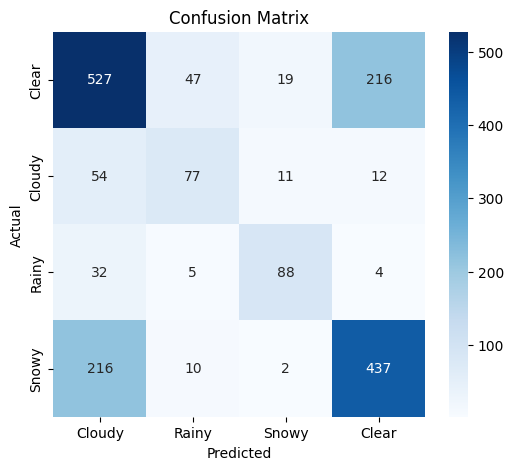

In [34]:
#checking the prediction performance using confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[ "Cloudy", "Rainy", "Snowy", "Clear"])

# Display as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cloudy","Rainy","Snowy","Clear"],
            yticklabels=["Clear","Cloudy","Rainy","Snowy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
